# Import all required packages


In [4]:
import os
import yaml
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import image
import numpy as np
from ultralytics import YOLO
import shutil
import torch

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')


Using device: cuda


In [6]:
classes=os.listdir('data/Train')
classes


['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']

# Making directories to put images(for training and validation) in one folder and labels in other folder(for training and validation)

In [4]:
os.mkdir('images/')
os.mkdir('images/train')
os.mkdir('images/val')

os.mkdir('labels/')
os.mkdir('labels/train')
os.mkdir('labels/val')

In [6]:
for j in ['Train','Val']:
  for i in classes:
    for img in os.listdir('data/'+j+'/'+i+'/images'):
      source='data/'+j+'/'+i+'/images'+'/'+img
      if j == 'Train':
        destination='images/train'
      else:
        destination='images/val'
      shutil.copy(source,destination)
    print(f"Class {i} Completed✅")


Class Glioma Completed✅
Class Meningioma Completed✅
Class No Tumor Completed✅
Class Pituitary Completed✅
Class Glioma Completed✅
Class Meningioma Completed✅
Class No Tumor Completed✅
Class Pituitary Completed✅


In [8]:
for j in ['Train','Val']:
  for i in classes:
    for img in os.listdir('data/'+j+'/'+i+'/labels'):
      source='data/'+j+'/'+i+'/labels'+'/'+img
      if j == 'Train':
        destination='labels/train'
      else:
        destination='labels/val'
      shutil.copy(source,destination)
    print(f"Class {i} Completed✅")

Class Glioma Completed✅
Class Meningioma Completed✅
Class No Tumor Completed✅
Class Pituitary Completed✅
Class Glioma Completed✅
Class Meningioma Completed✅
Class No Tumor Completed✅
Class Pituitary Completed✅


# Import YOLO model

In [7]:
model = YOLO('yolov8n.pt').to(device)


In [8]:
dataset_yaml = {
    'path': 'C:/Files/Python/30 Days Of Heat/Computer Vision/Brain-Tumor_Detection',
    'train': 'images/train',
    'val': 'images/val',
    'names': classes
}

In [9]:
with open('dataset.yaml', 'w') as file:
    yaml.dump(dataset_yaml, file)

In [10]:
results = model.train(data="dataset.yaml", epochs=100, imgsz=640,plots=True)

engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=dataset.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=False, int8=False, dynamic

100%|██████████| 755k/755k [00:00<00:00, 1.45MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

AMP: checks passed 


train: Scanning C:\Files\Python\30 Days Of Heat\Computer Vision\Brain-Tumor_Detection\labels\train... 4737 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4737/4737 [00:02<00:00, 2242.98it/s]


train: New cache created: C:\Files\Python\30 Days Of Heat\Computer Vision\Brain-Tumor_Detection\labels\train.cache


val: Scanning C:\Files\Python\30 Days Of Heat\Computer Vision\Brain-Tumor_Detection\labels\val... 510 images, 3 backgrounds, 0 corrupt: 100%|██████████| 512/512 [00:00<00:00, 843.89it/s] 


val: New cache created: C:\Files\Python\30 Days Of Heat\Computer Vision\Brain-Tumor_Detection\labels\val.cache
Plotting labels to runs\detect\train3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.36G      1.017      2.381      1.215          1        640: 100%|██████████| 297/297 [00:38<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.42it/s]

                   all        512        554      0.703      0.701      0.756      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.32G      1.039      1.364      1.216          4        640: 100%|██████████| 297/297 [00:34<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.37it/s]

                   all        512        554      0.747      0.666      0.735      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.29G      1.038      1.097      1.204          1        640: 100%|██████████| 297/297 [00:34<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.66it/s]

                   all        512        554      0.784      0.749      0.825      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.31G      1.011     0.9881      1.195          0        640: 100%|██████████| 297/297 [00:37<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.40it/s]


                   all        512        554      0.827      0.727      0.833       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       2.3G     0.9951     0.8955      1.185          2        640: 100%|██████████| 297/297 [00:33<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.27it/s]

                   all        512        554      0.874      0.849      0.909      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       2.3G     0.9753     0.8529      1.185          1        640: 100%|██████████| 297/297 [00:34<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.88it/s]

                   all        512        554      0.862      0.802       0.89      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.29G     0.9484     0.8029      1.165          2        640: 100%|██████████| 297/297 [00:35<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.11it/s]

                   all        512        554      0.851      0.818      0.885      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.31G     0.9382     0.7678      1.151          6        640: 100%|██████████| 297/297 [00:36<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.78it/s]

                   all        512        554      0.869      0.869      0.915      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100       2.3G     0.9331     0.7433      1.157          2        640: 100%|██████████| 297/297 [00:34<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.00it/s]

                   all        512        554      0.848      0.849      0.914      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       2.3G     0.9096     0.7148      1.131          1        640: 100%|██████████| 297/297 [00:34<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.91it/s]

                   all        512        554       0.92      0.883      0.937      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.29G     0.9035     0.6995      1.133          2        640: 100%|██████████| 297/297 [00:34<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.32it/s]

                   all        512        554      0.861      0.895      0.925      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.31G     0.8969      0.688      1.137          2        640: 100%|██████████| 297/297 [00:36<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.22it/s]


                   all        512        554      0.897      0.884      0.936      0.717

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       2.3G     0.8927     0.6717      1.127          3        640: 100%|██████████| 297/297 [00:37<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.11it/s]

                   all        512        554      0.951      0.873       0.95      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       2.3G     0.8843     0.6631      1.127          1        640: 100%|██████████| 297/297 [00:38<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.01it/s]

                   all        512        554      0.905      0.896      0.942      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.29G     0.8628     0.6229      1.108          2        640: 100%|██████████| 297/297 [00:37<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.31it/s]

                   all        512        554      0.935      0.896      0.937       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.31G     0.8678     0.6276      1.105          2        640: 100%|██████████| 297/297 [00:36<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.42it/s]

                   all        512        554      0.935      0.897      0.938      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       2.3G     0.8605     0.6231      1.101          1        640: 100%|██████████| 297/297 [00:37<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.07it/s]

                   all        512        554      0.895      0.907      0.937      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       2.3G     0.8574     0.6258        1.1          0        640: 100%|██████████| 297/297 [00:38<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.36it/s]

                   all        512        554      0.927      0.874      0.945      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.29G      0.842     0.5997      1.091          3        640: 100%|██████████| 297/297 [00:38<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.94it/s]

                   all        512        554       0.94      0.901      0.949      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.31G     0.8382     0.5911      1.097          1        640: 100%|██████████| 297/297 [00:36<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.28it/s]

                   all        512        554      0.926      0.916      0.955      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       2.3G     0.8351     0.5873      1.095          1        640: 100%|██████████| 297/297 [00:38<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.66it/s]

                   all        512        554      0.933      0.929       0.96      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       2.3G     0.8407     0.5839      1.097          1        640: 100%|██████████| 297/297 [00:38<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.10it/s]

                   all        512        554      0.915      0.937       0.96      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.29G     0.8229     0.5727      1.091          2        640: 100%|██████████| 297/297 [00:38<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.93it/s]

                   all        512        554      0.936      0.926      0.957      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.31G     0.8351     0.5663      1.087          1        640: 100%|██████████| 297/297 [00:38<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.04it/s]

                   all        512        554      0.914      0.914      0.961      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       2.3G     0.8162     0.5534      1.082          2        640: 100%|██████████| 297/297 [00:37<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.00it/s]

                   all        512        554      0.936      0.911      0.953      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       2.3G     0.8109     0.5563       1.08          2        640: 100%|██████████| 297/297 [00:37<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.93it/s]

                   all        512        554      0.935      0.898      0.957      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.29G     0.8154     0.5486      1.084          1        640: 100%|██████████| 297/297 [00:38<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.61it/s]

                   all        512        554      0.961      0.902      0.961      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.31G     0.8247     0.5505      1.085          3        640: 100%|██████████| 297/297 [00:37<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.02it/s]

                   all        512        554      0.961      0.914      0.959      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       2.3G     0.8026     0.5346      1.074          3        640: 100%|██████████| 297/297 [00:38<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.63it/s]

                   all        512        554      0.922      0.935      0.952      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       2.3G     0.7983      0.529      1.075          0        640: 100%|██████████| 297/297 [00:36<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.07it/s]

                   all        512        554       0.93      0.923      0.956      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.29G     0.7927     0.5233      1.072          3        640: 100%|██████████| 297/297 [00:37<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]

                   all        512        554      0.942      0.898       0.95      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.31G     0.7998     0.5248       1.07          5        640: 100%|██████████| 297/297 [00:35<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.42it/s]

                   all        512        554      0.923      0.945      0.957      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       2.3G     0.7906     0.5111      1.068          3        640: 100%|██████████| 297/297 [00:35<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.69it/s]

                   all        512        554       0.93      0.938       0.96      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       2.3G     0.7993     0.5166      1.074          3        640: 100%|██████████| 297/297 [00:34<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.68it/s]


                   all        512        554      0.929       0.93      0.958       0.77

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.29G     0.7876      0.507      1.064          2        640: 100%|██████████| 297/297 [00:33<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.28it/s]

                   all        512        554      0.935      0.932      0.957      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.31G     0.7945     0.5115      1.062          2        640: 100%|██████████| 297/297 [00:33<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.22it/s]

                   all        512        554      0.923      0.946      0.956      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       2.3G     0.7884     0.5059      1.062          3        640: 100%|██████████| 297/297 [00:37<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.87it/s]

                   all        512        554      0.936      0.936      0.959      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       2.3G     0.7875     0.4976      1.066          1        640: 100%|██████████| 297/297 [00:38<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.96it/s]

                   all        512        554      0.933       0.95      0.963      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.29G      0.767     0.4858      1.056          4        640: 100%|██████████| 297/297 [00:38<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.98it/s]

                   all        512        554      0.958      0.902       0.96      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.31G      0.766      0.492      1.055          1        640: 100%|██████████| 297/297 [00:37<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.09it/s]

                   all        512        554      0.945       0.93      0.965      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       2.3G     0.7799     0.4948      1.058          0        640: 100%|██████████| 297/297 [00:38<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]

                   all        512        554      0.945      0.919      0.953      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       2.3G     0.7723     0.4857       1.06          2        640: 100%|██████████| 297/297 [00:36<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.12it/s]


                   all        512        554      0.951      0.927      0.959      0.779

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.29G     0.7596     0.4754      1.049          4        640: 100%|██████████| 297/297 [00:38<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.99it/s]

                   all        512        554      0.948      0.941      0.963      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.31G     0.7437     0.4702      1.047          1        640: 100%|██████████| 297/297 [00:38<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.99it/s]

                   all        512        554      0.947      0.933      0.959      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100       2.3G     0.7588     0.4722      1.046          3        640: 100%|██████████| 297/297 [00:37<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.22it/s]

                   all        512        554      0.929      0.949      0.961      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       2.3G     0.7536     0.4667      1.051          2        640: 100%|██████████| 297/297 [00:37<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.02it/s]

                   all        512        554      0.953      0.926      0.961      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.29G     0.7538     0.4737      1.048          1        640: 100%|██████████| 297/297 [00:37<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.20it/s]

                   all        512        554      0.949      0.922      0.957      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.31G     0.7535     0.4706       1.04          1        640: 100%|██████████| 297/297 [00:37<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.85it/s]

                   all        512        554      0.926      0.949      0.957      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100       2.3G     0.7332     0.4549      1.036          0        640: 100%|██████████| 297/297 [00:37<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]

                   all        512        554      0.944      0.942      0.962      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100       2.3G     0.7487     0.4595       1.04          0        640: 100%|██████████| 297/297 [00:38<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.04it/s]

                   all        512        554      0.947      0.928      0.958      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.29G     0.7542     0.4704      1.049          2        640: 100%|██████████| 297/297 [00:38<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.93it/s]

                   all        512        554      0.948      0.939       0.96      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.31G     0.7418     0.4536       1.04          2        640: 100%|██████████| 297/297 [00:39<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.93it/s]

                   all        512        554      0.948      0.921      0.957       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100       2.3G     0.7408     0.4519      1.041          4        640: 100%|██████████| 297/297 [00:38<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.04it/s]

                   all        512        554      0.939      0.934      0.958      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100       2.3G     0.7389      0.452      1.043          2        640: 100%|██████████| 297/297 [00:33<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.15it/s]

                   all        512        554      0.965      0.919       0.96      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.29G     0.7234     0.4472      1.028          0        640: 100%|██████████| 297/297 [00:33<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.41it/s]

                   all        512        554      0.949      0.933      0.961      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.31G     0.7321     0.4429      1.034          4        640: 100%|██████████| 297/297 [00:34<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.06it/s]


                   all        512        554      0.949      0.943      0.965      0.783

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100       2.3G     0.7237     0.4469      1.034          2        640: 100%|██████████| 297/297 [00:33<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.35it/s]

                   all        512        554      0.952      0.949      0.961      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100       2.3G      0.722     0.4349      1.033          1        640: 100%|██████████| 297/297 [00:34<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.90it/s]

                   all        512        554      0.945      0.946      0.962      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.29G     0.7316     0.4403      1.034          1        640: 100%|██████████| 297/297 [00:34<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.80it/s]

                   all        512        554       0.94      0.943      0.962      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.31G     0.7127       0.43      1.024          3        640: 100%|██████████| 297/297 [00:33<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.02it/s]

                   all        512        554      0.947      0.934      0.964       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100       2.3G       0.72     0.4333      1.024          2        640: 100%|██████████| 297/297 [00:34<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.69it/s]

                   all        512        554      0.961      0.922      0.962      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100       2.3G     0.7066     0.4291      1.022          0        640: 100%|██████████| 297/297 [00:33<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.60it/s]

                   all        512        554      0.948      0.942      0.967      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.29G     0.7224     0.4281      1.028          4        640: 100%|██████████| 297/297 [00:33<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.53it/s]

                   all        512        554      0.945      0.939      0.959      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.31G      0.724     0.4244      1.035          1        640: 100%|██████████| 297/297 [00:33<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.15it/s]

                   all        512        554      0.949      0.945      0.961      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100       2.3G     0.7133     0.4371      1.029          1        640: 100%|██████████| 297/297 [00:33<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.25it/s]

                   all        512        554      0.944      0.937      0.963      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100       2.3G     0.6989     0.4162      1.018          0        640: 100%|██████████| 297/297 [00:33<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.44it/s]

                   all        512        554      0.945      0.948      0.964      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.29G     0.6978     0.4019      1.014          5        640: 100%|██████████| 297/297 [00:33<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.74it/s]

                   all        512        554      0.947      0.939      0.961      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.31G     0.6975     0.4095      1.021          1        640: 100%|██████████| 297/297 [00:33<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.41it/s]

                   all        512        554      0.942       0.95      0.962       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100       2.3G     0.7098     0.4129      1.021          2        640: 100%|██████████| 297/297 [00:33<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.87it/s]

                   all        512        554      0.938      0.947      0.959      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       2.3G     0.6925     0.4042      1.015          4        640: 100%|██████████| 297/297 [00:33<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.24it/s]


                   all        512        554       0.96      0.931      0.961      0.792

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.29G      0.689     0.3973      1.015          1        640: 100%|██████████| 297/297 [00:33<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.18it/s]

                   all        512        554      0.944      0.952      0.966      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.31G     0.6983      0.401      1.016          0        640: 100%|██████████| 297/297 [00:33<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.29it/s]

                   all        512        554      0.961      0.936      0.964       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       2.3G      0.686     0.3985      1.011          2        640: 100%|██████████| 297/297 [00:33<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.36it/s]

                   all        512        554      0.938      0.955      0.965      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100       2.3G      0.693     0.4102      1.016          1        640: 100%|██████████| 297/297 [00:33<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.08it/s]

                   all        512        554      0.948      0.945      0.966      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.29G     0.6862     0.3973      1.013          0        640: 100%|██████████| 297/297 [00:34<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.36it/s]

                   all        512        554       0.96      0.937      0.962      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.31G     0.6861     0.3926       1.01          4        640: 100%|██████████| 297/297 [00:33<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.37it/s]

                   all        512        554      0.943       0.94       0.96      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100       2.3G     0.6848     0.3929      1.009          1        640: 100%|██████████| 297/297 [00:34<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.06it/s]


                   all        512        554      0.954       0.94       0.96      0.794

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100       2.3G     0.6784     0.3931      1.013          1        640: 100%|██████████| 297/297 [00:34<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.23it/s]

                   all        512        554      0.969      0.925       0.96      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.29G     0.6728     0.3883      1.012          1        640: 100%|██████████| 297/297 [00:33<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.40it/s]

                   all        512        554      0.946      0.952      0.963      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.31G     0.6619     0.3766     0.9965          1        640: 100%|██████████| 297/297 [00:33<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.37it/s]

                   all        512        554      0.962      0.929      0.962      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100       2.3G     0.6704     0.3826      1.007          3        640: 100%|██████████| 297/297 [00:34<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.14it/s]

                   all        512        554      0.947       0.94      0.961       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100       2.3G      0.674     0.3841      1.008          2        640: 100%|██████████| 297/297 [00:33<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.96it/s]

                   all        512        554      0.938      0.953      0.961      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.29G     0.6694     0.3719      1.008          2        640: 100%|██████████| 297/297 [00:34<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.98it/s]

                   all        512        554       0.95      0.946      0.958        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.31G     0.6658      0.375      1.004          3        640: 100%|██████████| 297/297 [00:33<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.46it/s]

                   all        512        554      0.952      0.946      0.964      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100       2.3G     0.6644     0.3848     0.9989          1        640: 100%|██████████| 297/297 [00:33<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.53it/s]


                   all        512        554      0.949      0.952      0.963      0.797

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100       2.3G     0.6563     0.3692      1.002          2        640: 100%|██████████| 297/297 [00:33<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.33it/s]

                   all        512        554      0.946      0.955      0.963      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.29G      0.665     0.3768     0.9959          2        640: 100%|██████████| 297/297 [00:33<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.97it/s]

                   all        512        554      0.949      0.944       0.96      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.31G     0.6517     0.3864     0.9972          1        640: 100%|██████████| 297/297 [00:33<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.96it/s]

                   all        512        554      0.948      0.948      0.962        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100       2.3G       0.66     0.3844     0.9973          0        640: 100%|██████████| 297/297 [00:34<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.23it/s]

                   all        512        554      0.945      0.951      0.961      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100       2.3G      0.654     0.3674     0.9982          0        640: 100%|██████████| 297/297 [00:34<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.51it/s]

                   all        512        554      0.944       0.95       0.96      0.799


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.29G     0.6096     0.3213      0.966          1        640: 100%|██████████| 297/297 [00:34<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.04it/s]


                   all        512        554      0.939      0.953      0.964        0.8

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.31G     0.5954     0.3017     0.9561          1        640: 100%|██████████| 297/297 [00:35<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]

                   all        512        554      0.946      0.946      0.965      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100       2.3G      0.594     0.3047     0.9503          1        640: 100%|██████████| 297/297 [00:35<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.05it/s]


                   all        512        554      0.948      0.947      0.964      0.795

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       2.3G      0.589      0.304     0.9577          1        640: 100%|██████████| 297/297 [00:36<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.51it/s]


                   all        512        554       0.94      0.953       0.96      0.798

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.29G     0.5869     0.2991     0.9546          1        640: 100%|██████████| 297/297 [00:34<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.03it/s]


                   all        512        554      0.948      0.949      0.964        0.8

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.31G     0.5791     0.3131      0.947          1        640: 100%|██████████| 297/297 [00:34<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.47it/s]

                   all        512        554      0.947       0.95      0.963      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100       2.3G     0.5824     0.2953     0.9463          1        640: 100%|██████████| 297/297 [00:34<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.83it/s]


                   all        512        554      0.946      0.945      0.962      0.797

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100       2.3G     0.5749     0.2913     0.9451          2        640: 100%|██████████| 297/297 [00:34<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.40it/s]

                   all        512        554      0.951      0.945      0.963      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.29G     0.5797     0.3026     0.9498          1        640: 100%|██████████| 297/297 [00:36<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.29it/s]


                   all        512        554      0.948      0.943      0.962        0.8

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.31G     0.5741     0.2894     0.9421          1        640: 100%|██████████| 297/297 [00:33<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.08it/s]


                   all        512        554      0.953      0.942      0.963      0.801

100 epochs completed in 1.126 hours.
Optimizer stripped from runs\detect\train3\weights\last.pt, 6.3MB
Optimizer stripped from runs\detect\train3\weights\best.pt, 6.3MB

Validating runs\detect\train3\weights\best.pt...
Ultralytics YOLOv8.2.70  Python-3.10.13 torch-2.1.2 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.94it/s]


                   all        512        554      0.948      0.946      0.965      0.804
                Glioma        135        153      0.913      0.908      0.939      0.786
            Meningioma        140        142      0.993      0.991      0.993      0.846
              No Tumor         98         98       0.98      0.985      0.987      0.843
             Pituitary        154        161      0.905      0.901      0.941      0.741
Speed: 0.2ms preprocess, 2.8ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs\detect\train3


# Exporting the model for further use


In [12]:
model.export(format='onnx',keras=True)

Ultralytics YOLOv8.2.70  Python-3.10.13 torch-2.1.2 CPU (AMD Ryzen 7 7840HS w/ Radeon 780M Graphics)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs\detect\train3\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 8, 8400) (6.0 MB)

ONNX: starting export with onnx 1.16.1 opset 17...
ONNX: export success  1.0s, saved as 'runs\detect\train3\weights\best.onnx' (11.7 MB)

Export complete (2.9s)
Results saved to C:\Files\Python\30 Days Of Heat\Computer Vision\Brain-Tumor_Detection\runs\detect\train3\weights
Predict:         yolo predict task=detect model=runs\detect\train3\weights\best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs\detect\train3\weights\best.onnx imgsz=640 data=dataset.yaml  
Visualize:       https://netron.app


'runs\\detect\\train3\\weights\\best.onnx'

# Seeing the metrics used in YOLO 

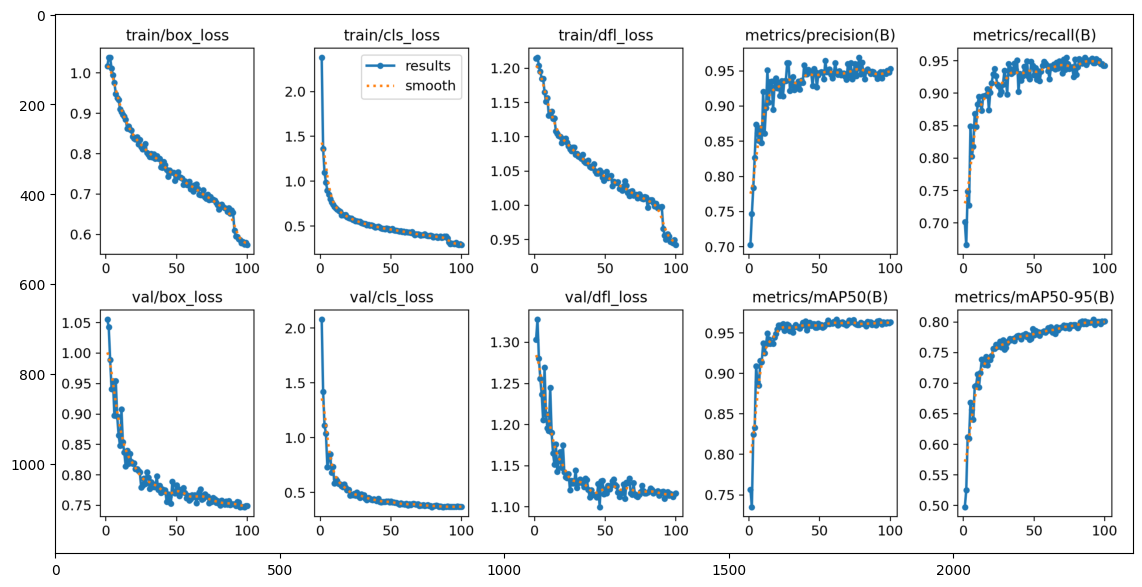

In [28]:
metrics=image.imread('runs/detect/train3/results.png')
plt.figure(figsize=(15,7))
plt.imshow(metrics)
plt.show()

Confusion Matrix for validation batch

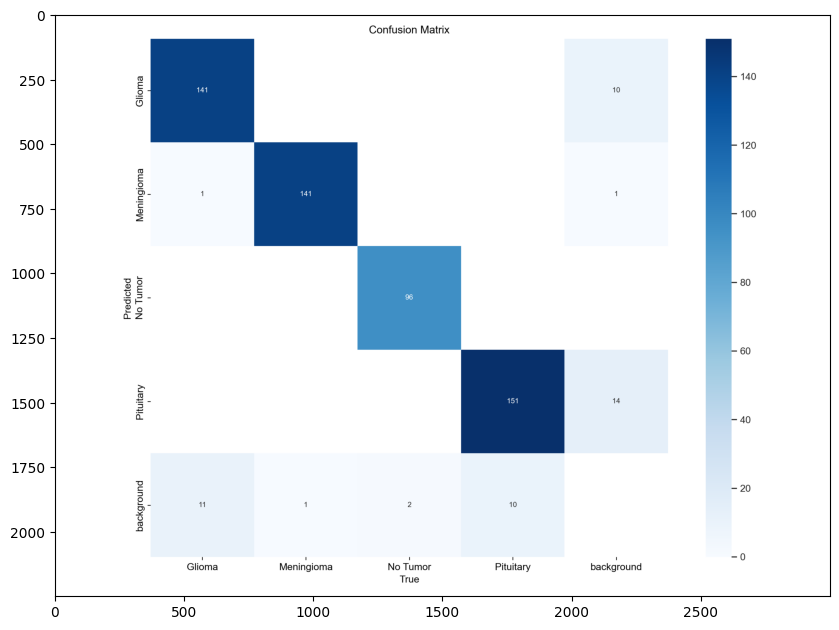

In [30]:
conf_matrix=image.imread('runs/detect/train3/confusion_matrix.png')
plt.figure(figsize=(10,10))
plt.imshow(conf_matrix)
plt.show()

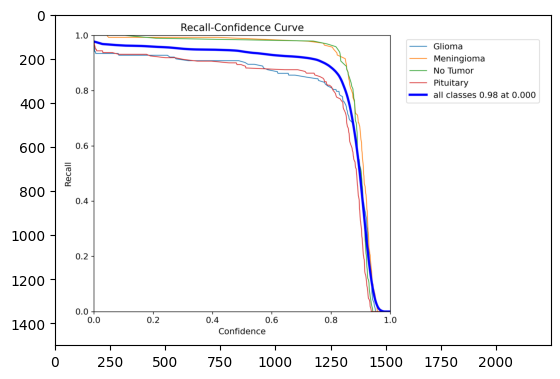

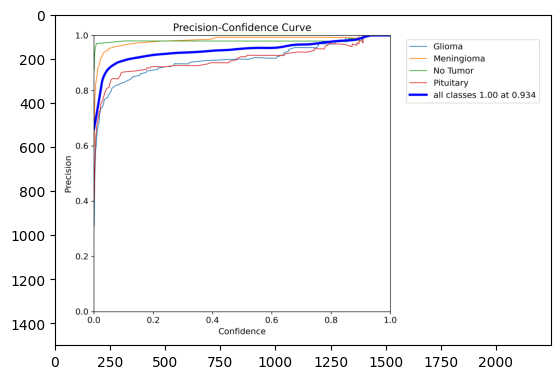

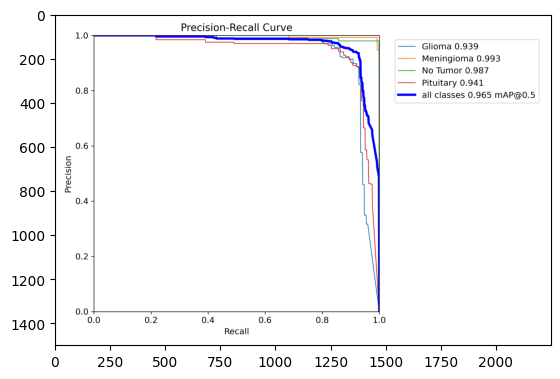

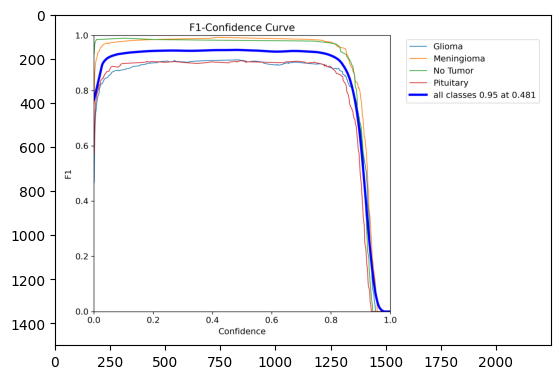

In [31]:
curves=['R_curve','P_curve','PR_curve','F1_curve']
for curve in curves:
    img=image.imread('runs/detect/train3/'+curve+'.png')
    plt.imshow(img)
    plt.show()

# Actual Labels vs Predicted for Validation set

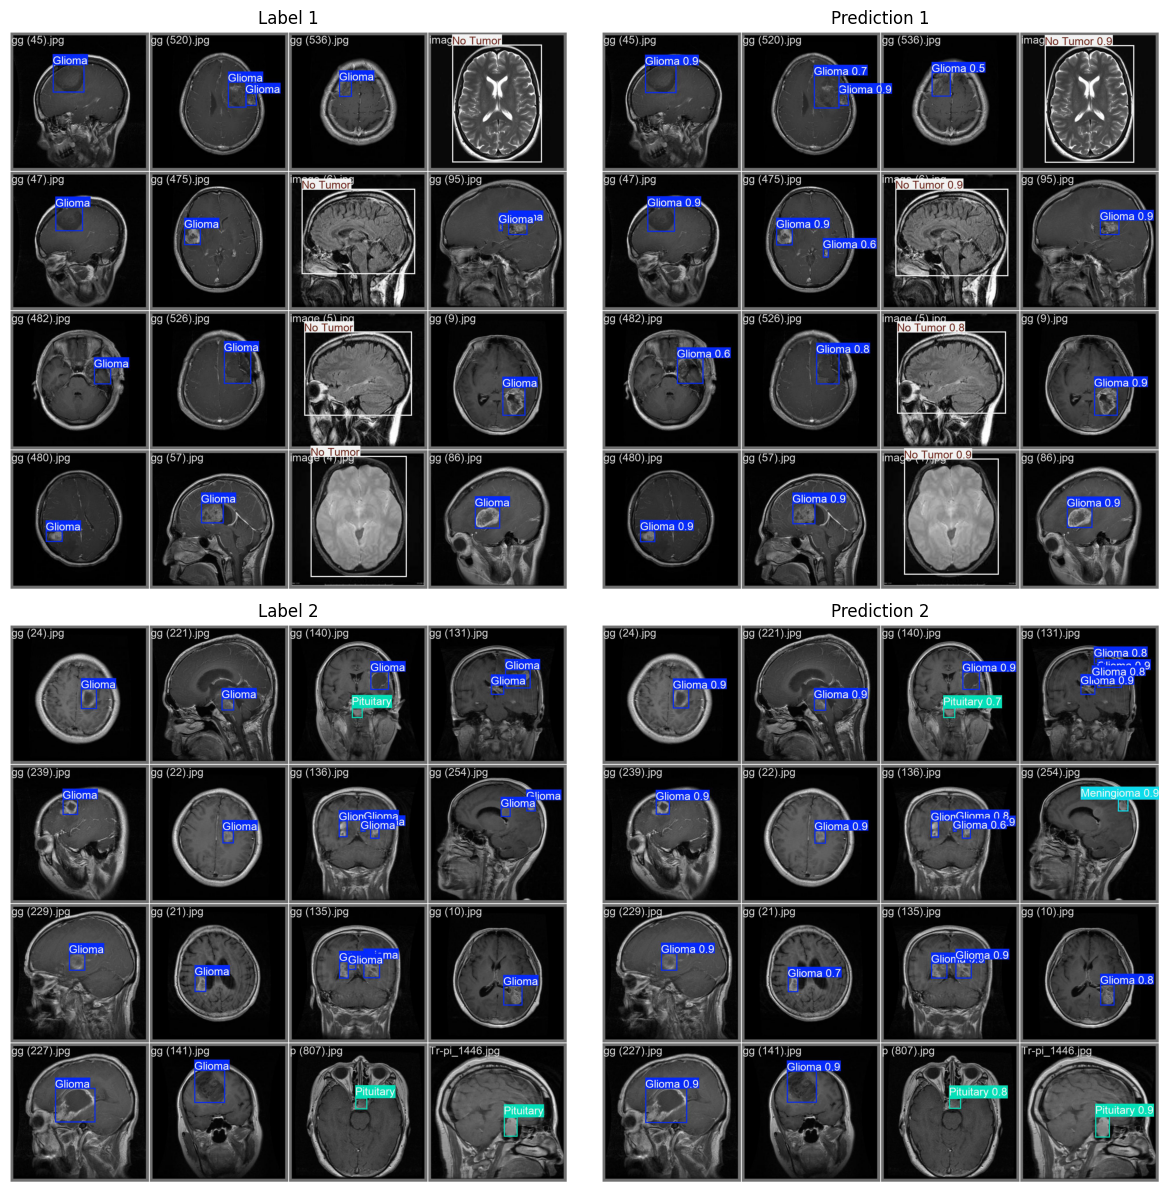

In [34]:
# Read images
label1 = plt.imread('runs/detect/train3/val_batch1_labels.jpg')
label2 = plt.imread('runs/detect/train3/val_batch2_labels.jpg')
pred1 = plt.imread('runs/detect/train3/val_batch1_pred.jpg')
pred2 = plt.imread('runs/detect/train3/val_batch2_pred.jpg')

# Create subplots with increased figure size
fig, axarr = plt.subplots(2, 2, figsize=(12, 12))

# Display images with titles and remove axis numbers
axarr[0, 0].imshow(label1)
axarr[0, 0].set_title('Label 1')
axarr[0, 0].axis('off')

axarr[0, 1].imshow(pred1)
axarr[0, 1].set_title('Prediction 1')
axarr[0, 1].axis('off')

axarr[1, 0].imshow(label2)
axarr[1, 0].set_title('Label 2')
axarr[1, 0].axis('off')

axarr[1, 1].imshow(pred2)
axarr[1, 1].set_title('Prediction 2')
axarr[1, 1].axis('off')

# Adjust layout with reduced padding
plt.tight_layout(pad=1)
plt.show()

# Testing the model on images from internet

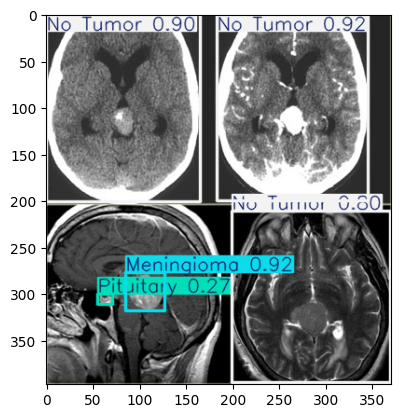

In [61]:
# Save results as .png
results[0].save('results.png')

# Display results with matplotlib
plt.imshow(image.imread('results.png'))
plt.show()